In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [93]:
tr = pd.read_csv('Titanic-Dataset.csv', index_col = 'PassengerId')

In [120]:
tr.Fare.max()


512.3292

In [94]:
ts = pd.read_csv('test.csv', index_col = 'PassengerId')

In [95]:
df = pd.concat([tr, ts], ignore_index=True, sort  = False)

In [37]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## осмотр данных

In [96]:
## tr
tr


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [97]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


1. drop(Cabin)

In [98]:
df = df.drop(['Name','Ticket','Cabin'], axis = 1)

In [99]:
tr = tr.drop(['Name','Ticket','Cabin'], axis = 1)

In [100]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [103]:
df.Embarked.fillna('S', inplace = True)

In [104]:
mf = df.Fare.median()
df.Fare.fillna(mf, inplace = True)

In [106]:
mf = df.Age.median()
df.Age.fillna(mf, inplace = True)

## Визуализация

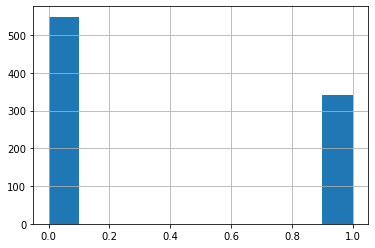

In [63]:
df['Survived'].hist();

<AxesSubplot:>

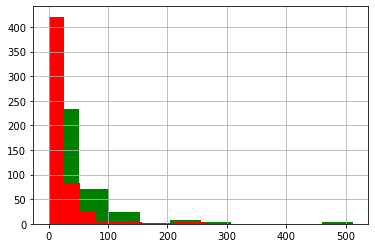

In [64]:
tr[tr['Survived'] == 1]['Fare'].hist(color="green")
tr[tr['Survived'] == 0]['Fare'].hist(color="red")

<AxesSubplot:xlabel='Sex', ylabel='count'>

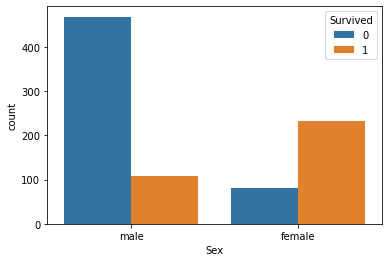

In [65]:
sns.countplot(x = 'Sex', hue = 'Survived', data = tr)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   int64   
 2   Sex         1309 non-null   int64   
 3   Age         1309 non-null   float64 
 4   SibSp       1309 non-null   int64   
 5   Parch       1309 non-null   int64   
 6   Fare        1309 non-null   float64 
 7   Embarked    1309 non-null   object  
 8   Fare_Range  1292 non-null   category
 9   relatives   1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(1)
memory usage: 93.6+ KB


In [117]:
df.Fare.describe()

count    1309.000000
mean       33.281086
std        51.741500
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

## Конструирование признаков

In [123]:
df['Fare_Range'] = pd.cut(df.Fare, bins = [-1, 8, 14.5, 31, 513], labels = ['min', 'mid_min', 'mid_max', 'max'], 
                          include_lowest=False)

<AxesSubplot:xlabel='Fare_Range', ylabel='count'>

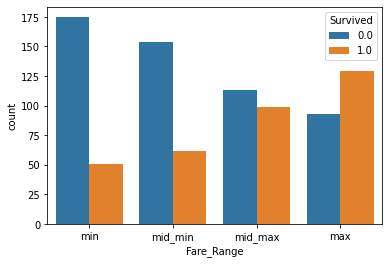

In [73]:
sns.countplot(x = 'Fare_Range', hue = 'Survived', data = df)

In [78]:
df['Age_Range'] = pd.cut(df.Age, [0, 10, 20, 30, 40, 50, 60,70,80])

<AxesSubplot:xlabel='Age_Range', ylabel='count'>

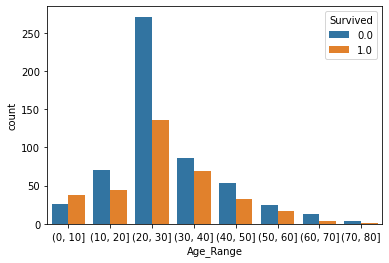

In [79]:
sns.countplot(x = 'Age_Range', hue = 'Survived', data = df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

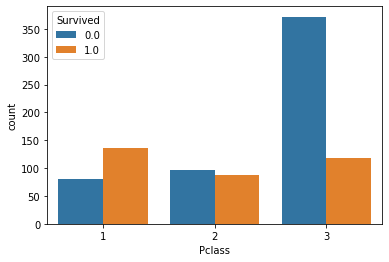

In [81]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = df)

<AxesSubplot:>

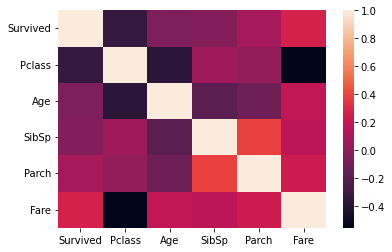

In [82]:
sns.heatmap(df.corr())

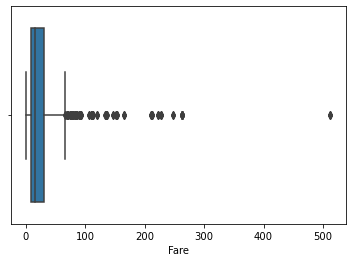

In [83]:
sns.boxplot(x = df['Fare']);

In [84]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_Range', 'Age_Range'],
      dtype='object')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

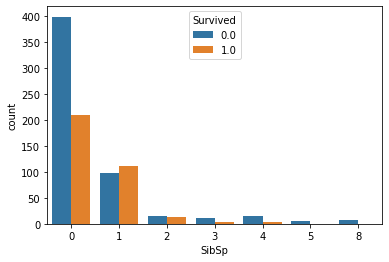

In [86]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

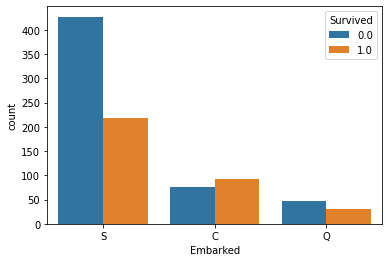

In [90]:
sns.countplot(x = 'Embarked', hue = 'Survived', data = df)

In [110]:
df['relatives'] = df.Parch + df.SibSp

In [121]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Fare_Range', 'relatives'],
      dtype='object')

In [122]:
df[df.Fare_Range.isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range,relatives
179,0.0,3,1,36.0,0,0,0.0,S,NaN,0
263,0.0,1,1,40.0,0,0,0.0,S,NaN,0
271,1.0,3,1,25.0,0,0,0.0,S,NaN,0
277,0.0,2,1,28.0,0,0,0.0,S,NaN,0
302,0.0,3,1,19.0,0,0,0.0,S,NaN,0
413,0.0,2,1,28.0,0,0,0.0,S,NaN,0
466,0.0,2,1,28.0,0,0,0.0,S,NaN,0
481,0.0,2,1,28.0,0,0,0.0,S,NaN,0
597,0.0,3,1,49.0,0,0,0.0,S,NaN,0
633,0.0,1,1,28.0,0,0,0.0,S,NaN,0


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    float64 
 1   Pclass      1309 non-null   int64   
 2   Sex         1309 non-null   int64   
 3   Age         1309 non-null   float64 
 4   SibSp       1309 non-null   int64   
 5   Parch       1309 non-null   int64   
 6   Fare        1309 non-null   float64 
 7   Embarked    1309 non-null   object  
 8   Fare_Range  1309 non-null   category
 9   relatives   1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(1)
memory usage: 93.6+ KB


## Работа с пропущенными значениями

In [125]:
df = df.drop(['Parch','SibSp', 'Fare'], axis = 1)

In [126]:
df

,Survived,Pclass,Sex,Age,Embarked,Fare_Range,relatives
0,0.0,3,1,22.0,S,min,1
1,1.0,1,0,38.0,C,max,1
2,1.0,3,0,26.0,S,min,0
3,1.0,1,0,35.0,S,max,1
4,0.0,3,1,35.0,S,mid_min,0
...,...,...,...,...,...,...,...
1304,NaN,3,1,28.0,S,mid_min,0
1305,NaN,1,0,39.0,C,max,0
1306,NaN,3,1,38.5,S,min,0
1307,NaN,3,1,28.0,S,mid_min,0


In [129]:
df = pd.get_dummies(df)

In [130]:
df

,Survived,Pclass,Sex,Age,relatives,Embarked_C,Embarked_Q,Embarked_S,Fare_Range_min,Fare_Range_mid_min,Fare_Range_mid_max,Fare_Range_max
0,0.0,3,1,22.0,1,0,0,1,1,0,0,0
1,1.0,1,0,38.0,1,1,0,0,0,0,0,1
2,1.0,3,0,26.0,0,0,0,1,1,0,0,0
3,1.0,1,0,35.0,1,0,0,1,0,0,0,1
4,0.0,3,1,35.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,28.0,0,0,0,1,0,1,0,0
1305,NaN,1,0,39.0,0,1,0,0,0,0,0,1
1306,NaN,3,1,38.5,0,0,0,1,1,0,0,0
1307,NaN,3,1,28.0,0,0,0,1,0,1,0,0


## Кодирование признаков

In [112]:
df['Sex'] = df['Sex'].map({'female': 0, 'male':1})

In [113]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Fare_Range,relatives
0,0.0,3,1,22.0,1,0,7.2500,S,min,1
1,1.0,1,0,38.0,1,0,71.2833,C,max,1
2,1.0,3,0,26.0,0,0,7.9250,S,min,0
3,1.0,1,0,35.0,1,0,53.1000,S,max,1
4,0.0,3,1,35.0,0,0,8.0500,S,mid_min,0
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,28.0,0,0,8.0500,S,mid_min,0
1305,NaN,1,0,39.0,0,0,108.9000,C,max,0
1306,NaN,3,1,38.5,0,0,7.2500,S,min,0
1307,NaN,3,1,28.0,0,0,8.0500,S,mid_min,0


In [ ]:
## Разделение данных

In [131]:
X_to_be_predicted = df[df.Survived.isnull()]

In [134]:
X_to_train = df[df.Survived > -1]

In [138]:
X_to_be_predicted

,Pclass,Sex,Age,relatives,Embarked_C,Embarked_Q,Embarked_S,Fare_Range_min,Fare_Range_mid_min,Fare_Range_mid_max,Fare_Range_max
891,3,1,34.5,0,0,1,0,1,0,0,0
892,3,0,47.0,1,0,0,1,1,0,0,0
893,2,1,62.0,0,0,1,0,0,1,0,0
894,3,1,27.0,0,0,0,1,0,1,0,0
895,3,0,22.0,2,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,1,28.0,0,0,0,1,0,1,0,0
1305,1,0,39.0,0,1,0,0,0,0,0,1
1306,3,1,38.5,0,0,0,1,1,0,0,0
1307,3,1,28.0,0,0,0,1,0,1,0,0


In [137]:
X_to_be_predicted.drop(['Survived'], axis = 1, inplace = True)

/home/sergey/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [139]:
Y = X_to_train['Survived']

In [140]:
X_to_train.drop(['Survived'], axis = 1, inplace = True)

/home/sergey/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Прогнозирование и оценка моделей

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
rf = RandomForestClassifier(max_depth = 5)

In [154]:
rf.fit(X_to_train,Y)

RandomForestClassifier(max_depth=5)

In [155]:
rf.score(X_to_train,Y)

0.8518518518518519

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
cross_val_score(rf, X_to_train, Y, cv = 5)

array([0.81005587, 0.84269663, 0.8258427 , 0.79213483, 0.83146067])

In [158]:
pred = rf.predict(X_to_be_predicted)

In [161]:
pred = pred.astype(int)

In [163]:
result = pd.DataFrame(data = pred, columns = ['result'], index = X_to_be_predicted.index)

In [165]:
result.to_csv('Результат.csv')